In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reading images and video

In [14]:
img = cv2.imread('cd.JPG')

In [15]:
# cv2.imshow(img)
# # cv2.waitKey(0)

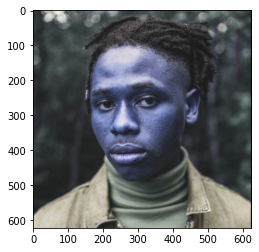

In [17]:
plt.imshow(img)

In [6]:
# # capture = cv2.VideoCapture('')#accepts int 0-3 or file path
# while True:
#     isTrue,frame = capture.read()
# if cv2.waitKey(20) & 0xFF == ord('d'):
#     break
# capture.release()
# cv2.destroyAllWindows()
# cv2.waitKey(0)

# Resizing and Rescaling

In [19]:
def rescaleFrame(frame,scale = 0.75):
    width = int(frame.shape[1]*scale)#width of inp img
    height = int(frame.shape[0]*scale) #height of inp img
    dimen = (width,height)
    
    return cv2.resize(frame,dimen,interpolation = cv2.INTER_AREA)
#this func works for img,vde,live capture

In [22]:
frame_read = cv2.imread('cd.JPG')

In [23]:
frame_resized = rescaleFrame(frame_read)

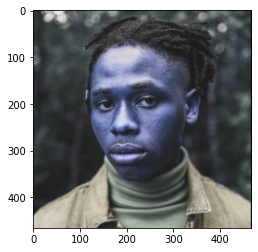

In [24]:
plt.imshow(frame_resized)

In [25]:
frame_resized = rescaleFrame(frame_read,scale = 0.25)

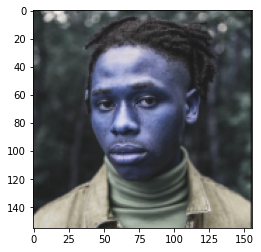

In [26]:
plt.imshow(frame_resized)

In [27]:
#this func works for live capture only

In [28]:
# def changeResolution(width,height):
#     capture.set(3,width)
#     capture.set(4,height)

# Draw and write on images

In [30]:
img  = cv2.imread("cd.JPG")

In [31]:
#there are 2 ways of drawing on image
## 1) on inp image itself
## 2) by creating a blank img

In [40]:
#creating a blank img
blank = np.zeros((500,500,3),dtype = 'uint8')
blank1 = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)

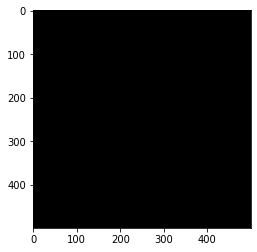

In [41]:
plt.imshow(blank1)

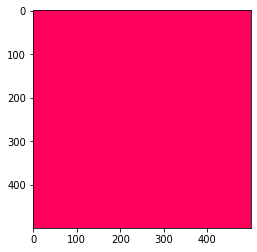

In [53]:
#paint img with ceratain c0lor
#say green
# blank[:] = 0,255,0
blank[:] = 255,0,92
# blank1 = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)
plt.imshow(blank)

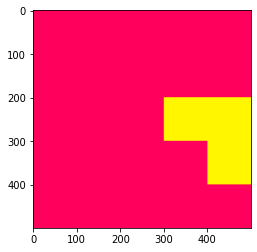

In [52]:
# blank[300:400,500:600] = 255,246,0
# plt.imshow(blank)

In [56]:
rect = cv2.rectangle(blank,(10,10),(200,350),(255,246,0),thickness = 2)

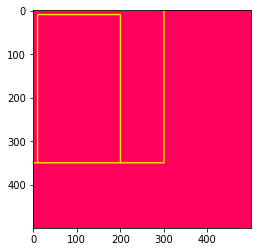

In [57]:
plt.imshow(rect)

In [59]:
rect = cv2.rectangle(blank,(10,10),(200,350),(255,246,0),thickness = cv2.FILLED)

In [61]:
#filled is same as -1 in thickness which gives same o/p

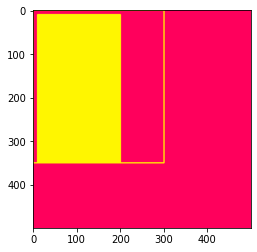

In [60]:
plt.imshow(rect)

In [68]:
rect_new = cv2.rectangle(blank,(0,0),(blank.shape[1]//3, blank.shape[0]//3), (0, 0, 0), -1)

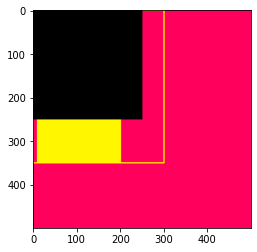

In [69]:
plt.imshow(rect_new)

In [70]:
cir = cv2.circle(blank,(250,250),40,(0,0,255),thickness = 2)

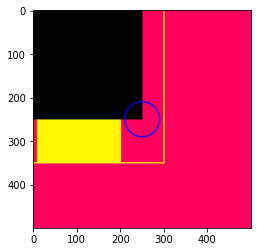

In [71]:
plt.imshow(cir)

In [73]:
line = cv2.line(blank,(0,0),(255,255),(255,255,255),thickness = 5)

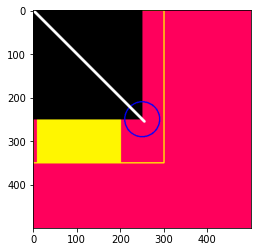

In [74]:

plt.imshow(line)

In [76]:
canvas = np.ones((500,500,3),dtype = 'uint8')

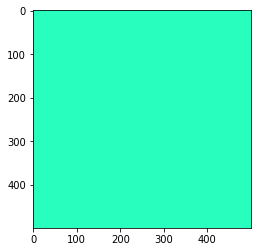

In [77]:
canvas[:]= (40, 255, 191)
plt.imshow(canvas)

In [88]:
text1 = cv2.putText(canvas,"BAIRAVI",(225,225),
                   cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,0,92),2)

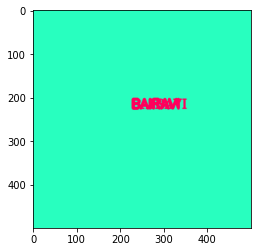

In [89]:
plt.imshow(text1)

# IMPORTANT BASIC FUNCTIONS

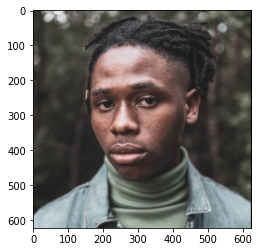

In [5]:
img = cv2.imread("cd.JPG")
plt.imshow(img[...,::-1])

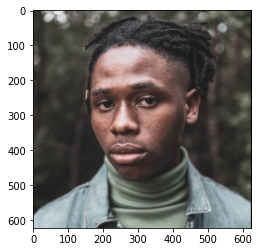

In [15]:
rgg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgg)

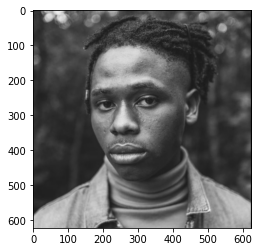

In [18]:
gray = cv2.cvtColor(rgg,cv2.COLOR_RGB2GRAY)
gray1 = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
plt.imshow(gray1)

Other libraries, such as PIL/Pillow, scikit-image, matplotlib, pyvips store images in conventional RGB order in memory.But opencv store in bgr


# BLUR A IMAGE

In [19]:
#gaussian blur
blurimg = cv2.GaussianBlur(rgg,(3,3),cv2.BORDER_DEFAULT)

In [27]:
fig = plt.figure()
# setting values to rows and column variables
rows = 2
columns = 2

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'blurred')

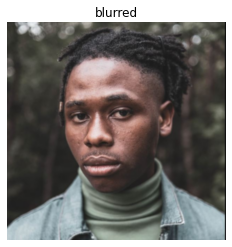

In [28]:
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(rgg)
plt.axis('off')
plt.title("original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(blurimg)
plt.axis('off')
plt.title("blurred")

In [31]:
img_ske = cv2.imread("skeleton.JPG")

# Edge cascade

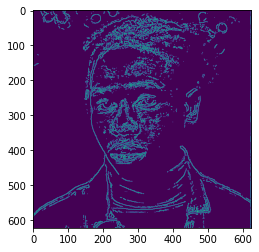

In [30]:
canny = cv2.Canny(rgg,100,100)
plt.imshow(canny)

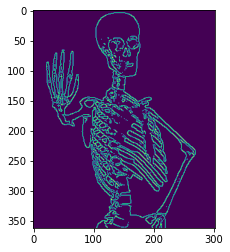

In [36]:
canny = cv2.Canny(img_ske,250,250)
plt.imshow(canny)

In [37]:
blur_ske = cv2.GaussianBlur(img_ske,(5,5),cv2.BORDER_DEFAULT)

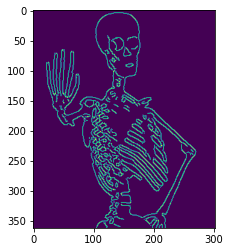

In [41]:
canny = cv2.Canny(blur_ske,125,175)
plt.imshow(canny)

# Dilation

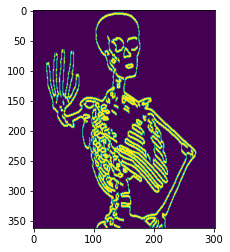

In [44]:
dilated = cv2.dilate(canny,(7,7),iterations=3)
plt.imshow(dilated)

# Erosion

In [47]:
eroded = cv2.erode(dilated,(3,3),iterations = 1)

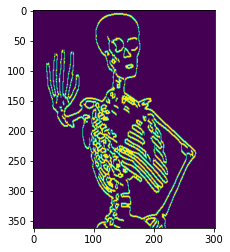

In [48]:
plt.imshow(eroded)

In [49]:
eroded = cv2.erode(dilated,(7,7),iterations=3)

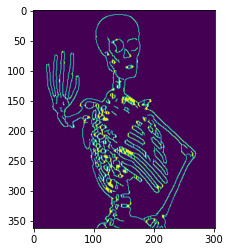

In [50]:
plt.imshow(eroded)

# Resize and Crop image

In [51]:
img = cv2.imread("cd.JPG")

In [52]:
resized = cv2.resize(img,(250,250))

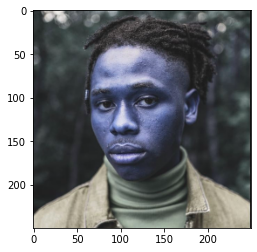

In [53]:
plt.imshow(resized)

In [54]:
#when shrinking use interpolation inter_area
#when enlarging use interpolation inter_linear or inter_cubic
#cubic is slowest but gives high quality

# Cropping

array slicing

In [55]:
cropped = img[50:200,200:400]

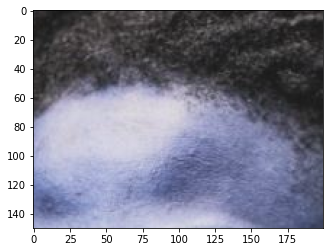

In [56]:
plt.imshow(cropped)

# Image Transformations

In [58]:
#translation - shift images up down left and right

# -x --- left
# +x --- right
# -y --- up
# +y --- down

In [ ]:
# # transformation matrix that will contain the information to transform the image

# [[size, rotation, location], ←x-axis
# [rotation, size, location]] ←y-axis

# default
# [[1, 0, 0]
#  [0, 1, 0]]

In [61]:
def translate(image,x,y):#x,y-no.of pixels to be shifted in x,y axis respectively
    translate_matrix = np.float32([[1,0,x],[0,1,y]])
    dimen = (image.shape[1],img.shape[0])
    return cv2.warpAffine(img,translate_matrix,dimen)
    

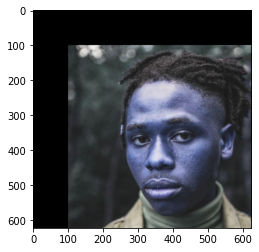

In [62]:
img = cv2.imread('cd.JPG')
translated = translate(img,100,100)
plt.imshow(translated)

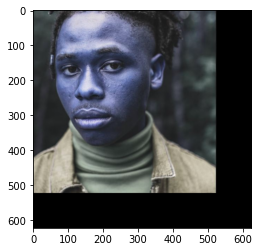

In [63]:
translated = translate(img,-100,-100)
plt.imshow(translated)

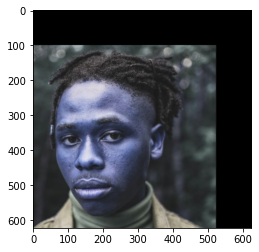

In [64]:
translated = translate(img,-100,100)
plt.imshow(translated)

# Rotation

In [66]:
#If we just need to turn the whole picture 90 degrees, .trasponse is an even handier method.

In [ ]:
# #clockwise - neg angle
# anti clockwise - + angle

In [65]:
def rotate(img,angle,rotation_point = None):
    (height,width) = img.shape[:2]
    
    if rotation_point is None:
        rotation_point = (width//2,height//2)
        
    rotation_matrix = cv2.getRotationMatrix2D(rotation_point,angle,1.0)
    dimen = (height,width)
    return cv2.warpAffine(img,rotation_matrix,dimen)
        
    

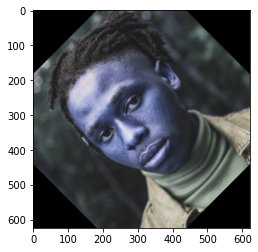

In [67]:
rotated = rotate(img,45)
plt.imshow(rotated)

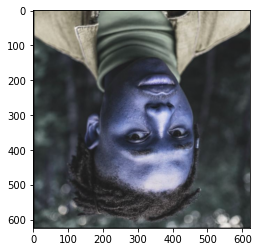

In [69]:
# rotated = rotate(img,90)
# plt.imshow(rotated)

rotated = rotate(img,180)
plt.imshow(rotated)

# Resize transformation

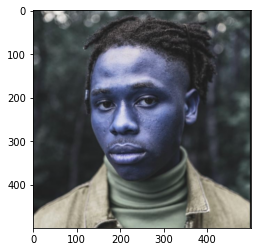

In [72]:
resized = cv2.resize(img,(500,500),interpolation = cv2.INTER_AREA )
plt.imshow(resized)

# Flip

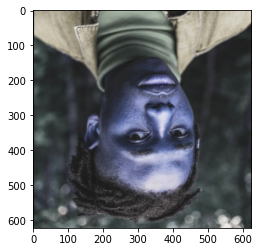

In [76]:
#can be 0 -vertically,1-horizontally,-1 -both hori,verti
# flip = cv2.flip(img,1)
# plt.imshow(flip)
# flip = cv2.flip(img,0)
# plt.imshow(flip)
flip = cv2.flip(img,-1)
plt.imshow(flip)

# cropping

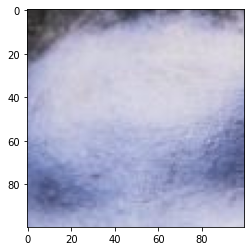

In [77]:
crp = img[100:200,200:300]

plt.imshow(crp)

# Contour Detection

In [2]:
img = cv2.imread('cd.JPG')


In [3]:
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


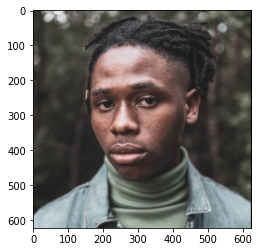

In [4]:
plt.imshow(rgb)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

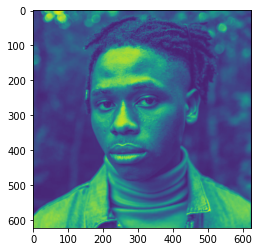

In [7]:
plt.imshow(gray)

In [93]:
# gray1 = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
# plt.imshow(gray1)

In [94]:
# above steps are only for ur understanding else bgr2gray is enough

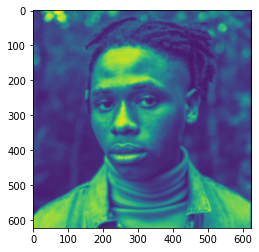

In [8]:
blur = cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(blur)

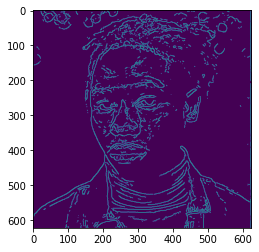

In [9]:
canny = cv2.Canny(blur,50,50)
plt.imshow(canny)

In [10]:
ret,thresh = cv2.threshold(gray,125,255,cv2.THRESH_BINARY)

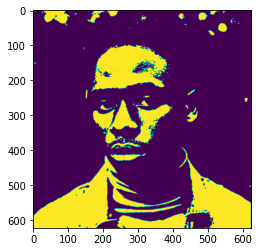

In [11]:
plt.imshow(thresh)

In [12]:
contours,hierarchy = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

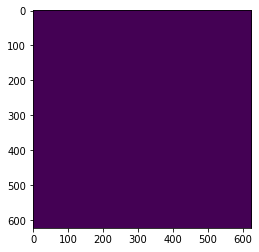

In [13]:
blank = np.zeros(img.shape[:2],dtype = 'uint8')
plt.imshow(blank)

In [14]:
contour_drawn = cv2.drawContours(blank,contours,-1,(0,0,255),2)

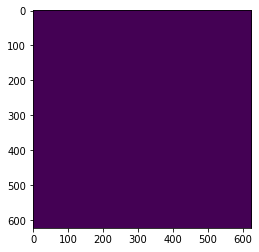

In [15]:
plt.imshow(contour_drawn)

In [22]:
import numpy as np
import cv2



In [18]:
im = cv2.imread('cd.JPG')


In [23]:
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

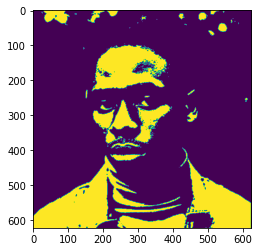

In [25]:
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
plt.imshow(thresh)

In [26]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

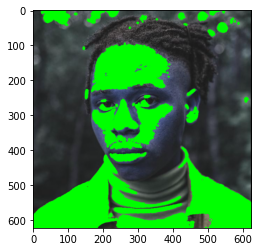

In [31]:

cv2.drawContours(im, contours, -1, (0,255,0), 5)
plt.imshow(im)

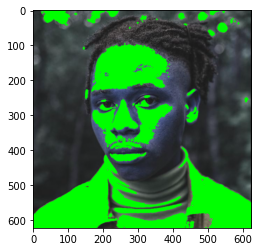

In [28]:
cv2.drawContours(im, contours, -1, (0,255,0), -1)
plt.imshow(im)

# Advanced

In [3]:
img = cv2.imread('cd.JPG')

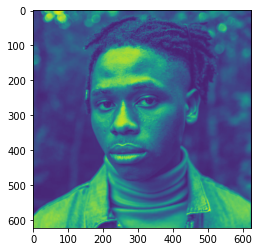

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

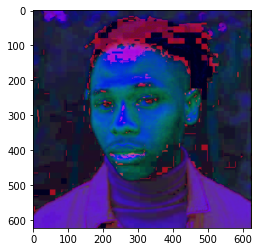

In [8]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

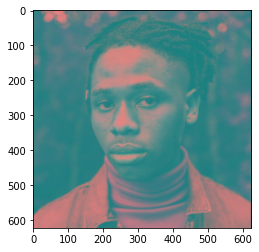

In [11]:
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
plt.imshow(lab)

In [12]:
#color inversion between cv,plt


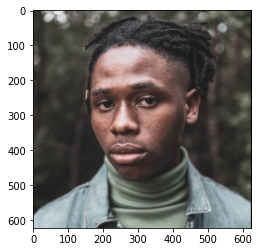

In [13]:
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [14]:
# not possible list
# 1) gray to hsv -->gray to bgr then that to hsv


# color channels

In [15]:
img = cv2.imread('cd.JPG')

In [16]:
b,g,r = cv2.split(img)

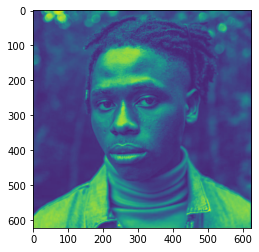

In [17]:
plt.imshow(b)#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

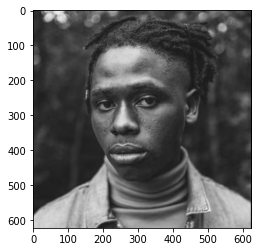

In [18]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))

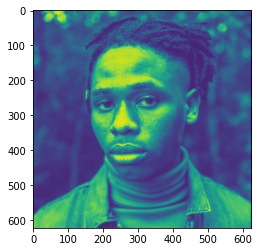

In [19]:
plt.imshow(r)

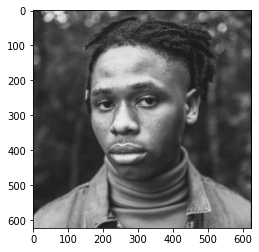

In [20]:
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

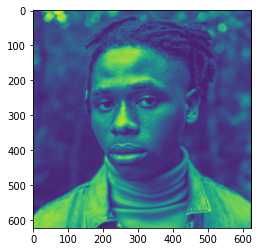

In [21]:
plt.imshow(g)

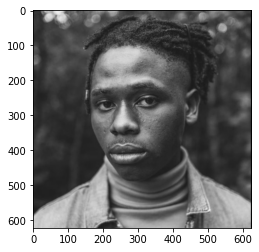

In [22]:
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))

In [23]:
print(img.shape)
print(b.shape)
print(r.shape)
print(g.shape)

(622, 624, 3)
(622, 624)
(622, 624)
(622, 624)


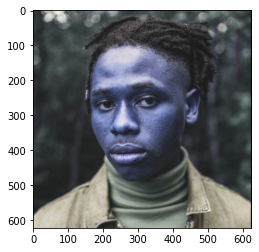

In [24]:
merged = cv2.merge([b,g,r])
plt.imshow(merged)

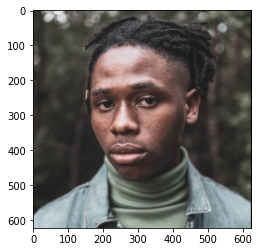

In [25]:
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))

In [26]:
blank = np.zeros(img.shape[:2],dtype = 'uint8')

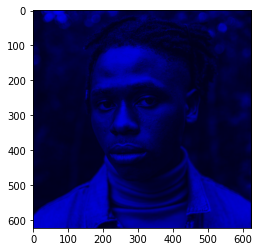

In [27]:
blue = cv2.merge([b,blank,blank])
plt.imshow(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))

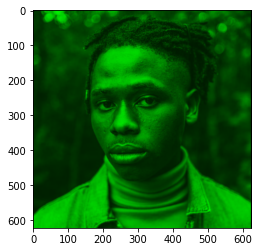

In [30]:
green = cv2.merge([blank,g,blank])
plt.imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))

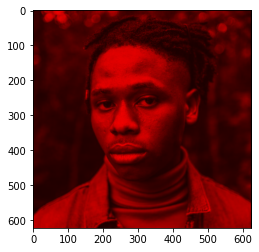

In [31]:
red = cv2.merge([blank,blank,r])
plt.imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))

# Blurring techniques

In [32]:
img = cv2.imread('cd.JPG')

In [37]:
#averaging

avg_blur = cv2.blur(img,(7,7))

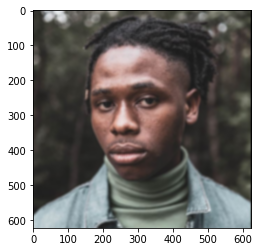

In [38]:
plt.imshow(cv2.cvtColor(avg_blur, cv2.COLOR_BGR2RGB))

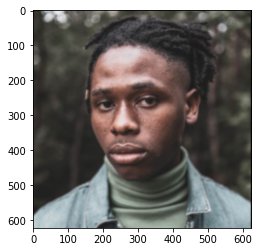

In [39]:
#gaussian_blur

ga_bl = cv2.GaussianBlur(img,(7,7),0)
plt.imshow(cv2.cvtColor(ga_bl, cv2.COLOR_BGR2RGB))

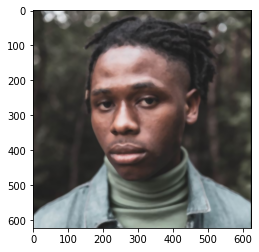

In [40]:
#median blur

med_bl = cv2.medianBlur(img,7)
plt.imshow(cv2.cvtColor(med_bl, cv2.COLOR_BGR2RGB))

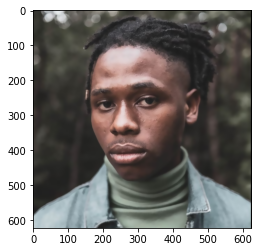

In [43]:
#bilateral

bil_bl = cv2.bilateralFilter(img,10,35,25)
plt.imshow(cv2.cvtColor(bil_bl, cv2.COLOR_BGR2RGB))

# Bitwise operations

In [44]:
blank = np.zeros((400,400),dtype = 'uint8')

In [45]:
rect = cv2.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv2.circle(blank.copy(),(200,200),200,255,-1)

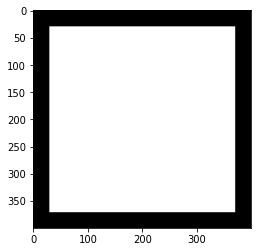

In [46]:
plt.imshow(cv2.cvtColor(rect, cv2.COLOR_BGR2RGB))

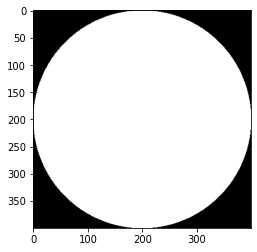

In [47]:
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))

In [48]:
#bitwise and-intersection

bitwise_and = cv2.bitwise_and(rect,circle)

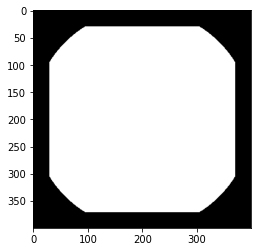

In [49]:
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))

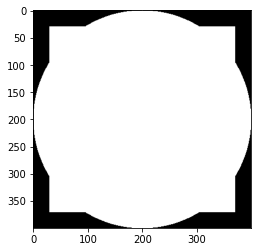

In [51]:
# bitwise_or

bitwise_or = cv2.bitwise_or(rect,circle)
plt.imshow(cv2.cvtColor(bitwise_or, cv2.COLOR_BGR2RGB))

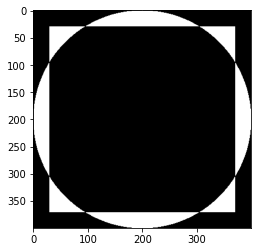

In [52]:
#bitwise_xor

bitwise_xor = cv2.bitwise_xor(rect,circle)
plt.imshow(cv2.cvtColor(bitwise_xor, cv2.COLOR_BGR2RGB))

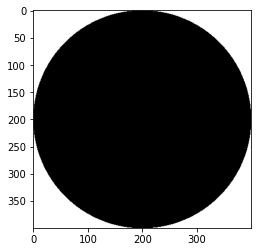

In [53]:
#bitwise_not
bitwise_not = cv2.bitwise_not(circle)
plt.imshow(cv2.cvtColor(bitwise_not, cv2.COLOR_BGR2RGB))

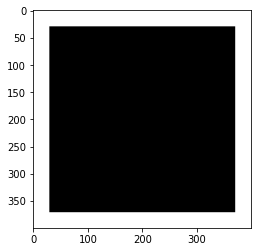

In [54]:
bitwise_not = cv2.bitwise_not(rect)
plt.imshow(cv2.cvtColor(bitwise_not, cv2.COLOR_BGR2RGB))

# Masking

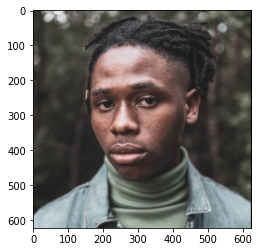

In [2]:
img  =cv2.imread('cd.JPG')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

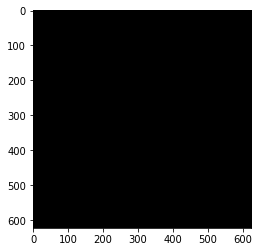

In [3]:
blank = np.zeros(img.shape[:2],dtype = 'uint8')

plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))

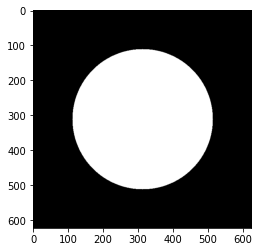

In [57]:
mask = cv2.circle(blank,(img.shape[1]//2,img.shape[0]//2),200,255,-1)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

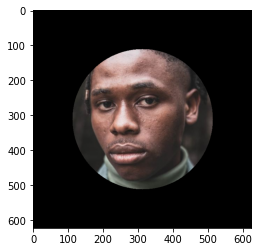

In [58]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

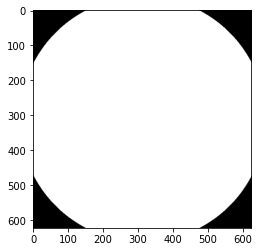

In [66]:
mask = cv2.circle(blank,(img.shape[1]//2,img.shape[0]//2),150,255,-1)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

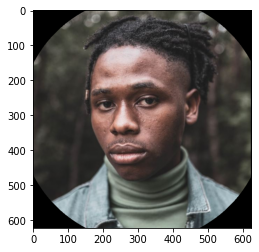

In [67]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

In [4]:
rect_mask = cv2.rectangle(blank,(50,50),(450,450),255,-1)

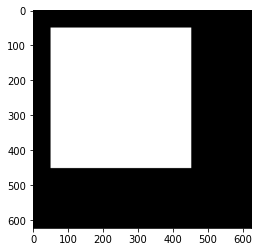

In [5]:
plt.imshow(cv2.cvtColor(rect_mask, cv2.COLOR_BGR2RGB))

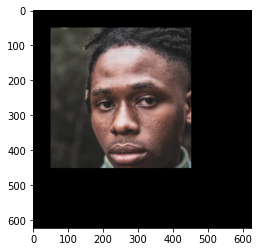

In [8]:
masked_rect = cv2.bitwise_and(img,img,mask = rect_mask)

plt.imshow(cv2.cvtColor(masked_rect, cv2.COLOR_BGR2RGB))

# Histograms

In [9]:
#a plot that gives a high level intuition of the pixel distribution of the image

In [10]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [11]:
img1 = np.array(img)

In [12]:
print(img1.max())
print(img1.min())

255
1


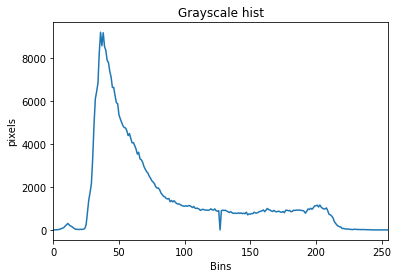

In [13]:
#grayscale histogram

gray_hist = cv2.calcHist([img],[0],None,[256],[1,255])

plt.figure()
plt.title("Grayscale hist")
plt.xlabel("Bins")
plt.ylabel("pixels")
plt.plot(gray_hist)
plt.xlim([0,255])
plt.show()

In [14]:
image = cv2.imread("skeleton.JPG")

In [15]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [16]:
img1 = np.array(image)

In [17]:
print(img1.max())
print(img1.min())

255
0


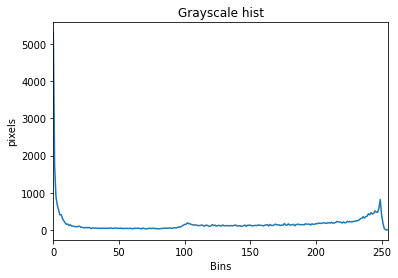

In [20]:
#grayscale histogram

gray_hist = cv2.calcHist([gray],[0],None,[256],[1,256])

plt.figure()
plt.title("Grayscale hist")
plt.xlabel("Bins")
plt.ylabel("pixels")
plt.plot(gray_hist)
plt.xlim([0,255])
plt.show()

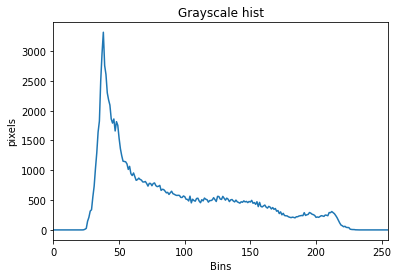

In [23]:
img  =cv2.imread('cd.JPG')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

blank = np.zeros(img.shape[:2],dtype = 'uint8')

circle = cv2.circle(blank,(img.shape[1]//2,img.shape[0]//2),200,255,-1)
masked_img = cv2.bitwise_and(gray,gray,mask = circle)
#grayscale histogram

gray_hist = cv2.calcHist([gray],[0],masked_img,[256],[1,256])

plt.figure()
plt.title("Grayscale hist")
plt.xlabel("Bins")
plt.ylabel("pixels")
plt.plot(gray_hist)
plt.xlim([0,255])
plt.show()

In [24]:
#color histogram

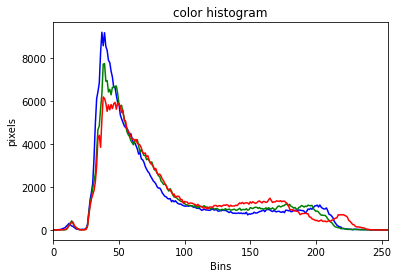

In [30]:
plt.figure()
plt.title("color histogram")
plt.xlabel("Bins")
plt.ylabel("pixels")

colors = ('b','g','r')

for i,cols in enumerate(colors):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = cols)
    plt.xlim([0,255])

plt.show()

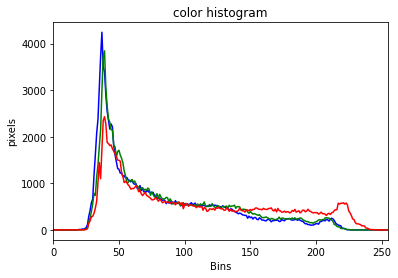

In [31]:
plt.figure()
plt.title("color histogram")
plt.xlabel("Bins")
plt.ylabel("pixels")

colors = ('b','g','r')

for i,cols in enumerate(colors):
    hist = cv2.calcHist([img],[i],masked_img,[256],[0,256])
    plt.plot(hist,color = cols)
    plt.xlim([0,255])

plt.show()

# Thresholding

In [32]:
img =  cv2.imread("cd.JPG")

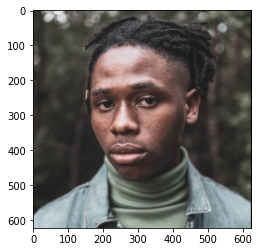

In [33]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

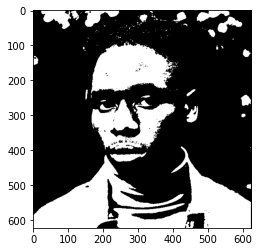

In [37]:
#simple thresh

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


threshold,thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

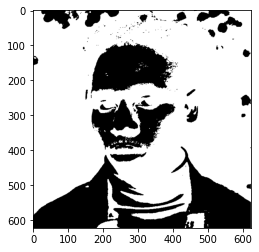

In [38]:
threshold,thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

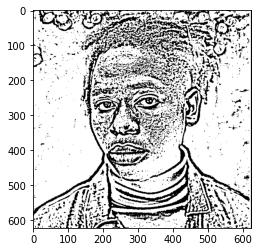

In [40]:
#adaptive thresholding

adaptive_thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,3)

plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_BGR2RGB))

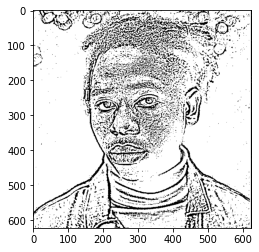

In [41]:
adaptive_thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)

plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_BGR2RGB))

# Edge detection

In [42]:
img = cv2.imread('cd.JPG')

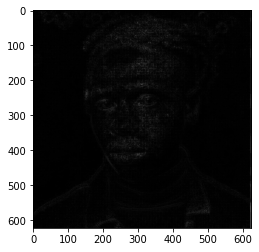

In [44]:
#laplacian


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

lap = cv2.Laplacian(gray,cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

plt.imshow(cv2.cvtColor(lap, cv2.COLOR_BGR2RGB))

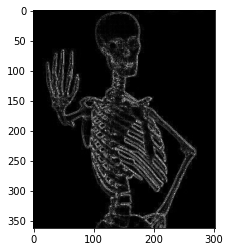

In [45]:
img = cv2.imread('skeleton.JPG')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

lap = cv2.Laplacian(gray,cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

plt.imshow(cv2.cvtColor(lap, cv2.COLOR_BGR2RGB))

In [50]:
#sobel

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=5)
combined_sobel = cv2.bitwise_or(sobelx, sobely)





In [51]:
plt.imshow(cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB))

error: OpenCV(4.2.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)
